# **Board Meeting Preparation**
##### **using Anomaly Detection**
<p align ="right">Zacharia Schmitz <br>
12 October 2023

---

<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Questions → Answers</i></font>

---

Email to analyst:

> Hello,
> 
> 
> I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following 
> questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.
> 
> 
> 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
>
> 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
>
> 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
>
> 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is
> happening? Are there any suspicious IP addresses?
>
> 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
>
> 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
>
> 7. Which lessons are least accessed?
>
> 8. Anything else I should be aware of?
>
> 
> Thank you. <br>

Initially, we used the .txt file provided for logs and the SQL server for cohort information.

Then we utilized the prepared and combined CSV ('curriculum_access.csv')

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Questions → Answers</i></font>

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wrangle as w

In [2]:
# Read in curriculum_access.csv and parse datetimes

df = pd.read_csv('curriculum_access.csv', parse_dates=['datetime', 'class_start', 'class_end'])

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Questions → Answers</i></font>

--- 

### What we did:

- With the Cohort information from SQL:

    - Mapped all of the program IDs to their cohort type
    
        - 1 = web development PHP (Hypertext Preprocessor)
        - 2 = web development Java
        - 3 = data science
        - 4 = web development front end only
        - Cohort ID number 28 was Staff

- With the logs fill from the original email:

    - Combined the date and time into one date time column
    - Renamed the endpoint column to path
    - Created an endpoint column from the last part of path
    - Created a startpoint from the beginning of path
    - Replaced "/" values in path to be "homepage"


- Joined the two dataframes using cohort_id (logs file) and id (cohort file)

We did not handle any nulls, due to the possible presence of anomalies.

Imputing any assumptions, could lead to improper handling of anomalies.

### Data After Preparation

In [3]:
w.check_columns(df)

Total rows: 900223
Total columns: 12


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,900223,0,0.00000,"RangeIndex(start=0, stop=900223, step=1)",None
1,Unnamed: 0,int64,900223,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 900222, 450111.0)"
2,path,object,2313,1,0.00000,"[homepage, java-ii, java-ii/object-oriented-pr...",None
3,user_id,int64,981,0,0.00000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(1, 981, 458.82570651938465)"
4,cohort_id,float64,47,52893,0.05876,"[8.0, 22.0, 21.0, 1.0, 16.0, 18.0, 19.0, nan, ...","(1.0, 139.0, 48.501049178006205)"
5,source_ip,object,5531,0,0.00000,"[97.105.19.61, 71.137.146.71, 209.205.123.242,...",None
6,datetime,datetime64[ns],856584,0,0.00000,"[2018-01-26 09:55:03, 2018-01-26 09:56:02, 201...","(2018-01-26, 2021-04-21)"
7,endpoint,object,1506,50330,0.05591,"[nan, java-ii, object-oriented-programming, ob...",None
8,startpoint,object,755,1,0.00000,"[homepage, java-ii, slides, javascript-i, mkdo...",None
9,name,object,47,52893,0.05876,"[Hampton, Teddy, Sequoia, Arches, Niagara, Pin...",None


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Questions**</i></font> <font size='5'><i>→ Answers</i></font>
---

It looks like Codeup has changed the web development program a few times. They have had:

- **Web Development Java (The current web development program)**
    - This seems to be the final and most recent iteration of the Codeup web dev cohort<br> <br>

- **Web Development PHP (Ended in 2017)**
    - The initial title for the first Codeup web dev cohorts<br> <br>

- **Web Development Front End Only (Only 2 Cohorts - Ended in 2016)**
    - very short lived and only had 2 cohorts, but the topics covered were different from the other 2<br> <br>

#### Initialize Dataframes

In [4]:
# List all of the programs

df.program.value_counts()

program
web_java     629334
data         103412
staff         84031
web_php       30548
web_front         5
Name: count, dtype: int64

In [5]:
# Web Java Dataframe

webjava = df[df.program == 'web_java']
webjava.shape

(629334, 12)

In [6]:
# Web PHP Dataframe

webphp = df[df.program == 'web_php']
webphp.shape

(30548, 12)

In [7]:
# Web Front End Dataframe

webfront = df[df.program == 'web_front']
webfront.shape

(5, 12)

In [8]:
# Make a data scientist dataframe

data = df[df.program == 'data']
data.shape

(103412, 12)

In [9]:
# Make a staff df

staff = df[df.program == 'staff']
staff.shape

(84031, 12)

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


<Axes: title={'center': 'Top 10 Pages for Web Frontend Dev'}, ylabel='path'>

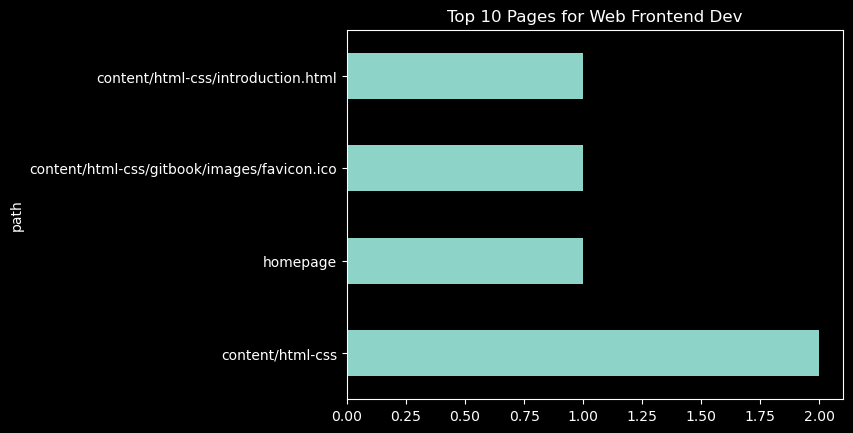

In [10]:
# Which lesson appears to attract the most traffic per program (web)

top10webfront = webfront.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Web Frontend Dev')

top10webfront

HTML-CSS Appears to be the most common lesson.

<Axes: title={'center': 'Top 10 Pages for Web PHP Dev'}, ylabel='path'>

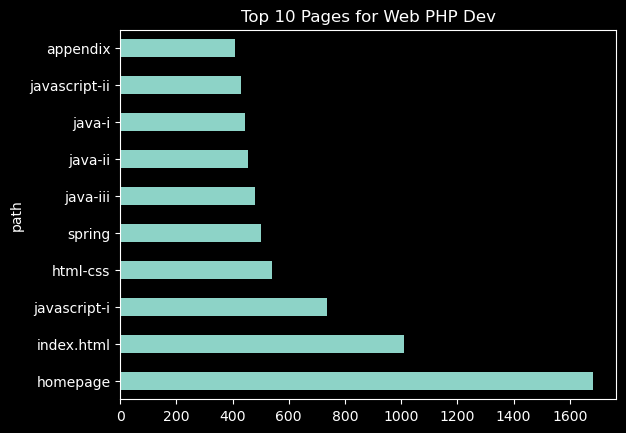

In [11]:
# Which lesson appears to attract the most traffic per program (web)

top10webphp = webphp.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Web PHP Dev')

top10webphp

Besides the homepage and index, Javascript I is the most common lesson.

<Axes: title={'center': 'Top 10 Pages for Web Java Dev'}, ylabel='path'>

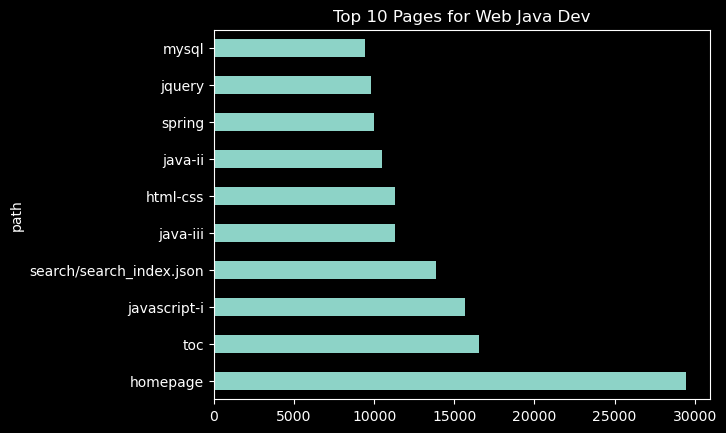

In [12]:
# Which lesson appears to attract the most traffic per program (web)

top10webjava = webjava.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Web Java Dev')

top10webjava

Besides homepage and table of contents (toc), Javascript I is the most common lesson.

<Axes: title={'center': 'Top 10 Pages for Data'}, ylabel='path'>

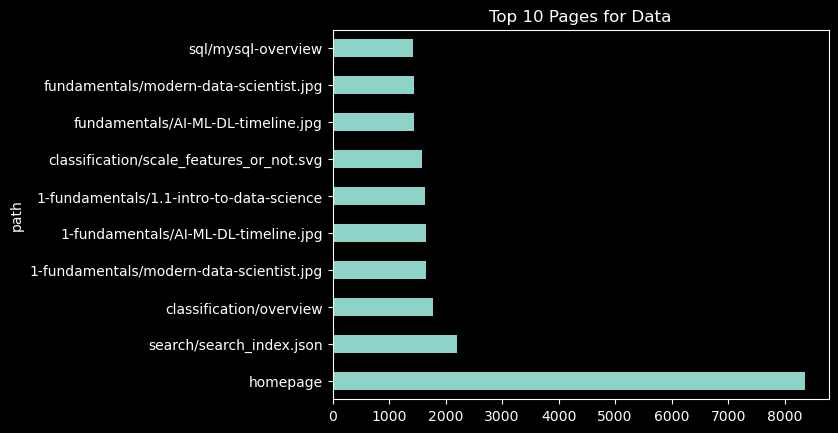

In [13]:
# Which lesson appears to attract the most traffic per program (data)

top10data = data.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Data')

top10data

Besides the homepage and search-index, Classification is the most common lesson.

Text(0.5, 1.0, 'Top 10 Pages for Staff')

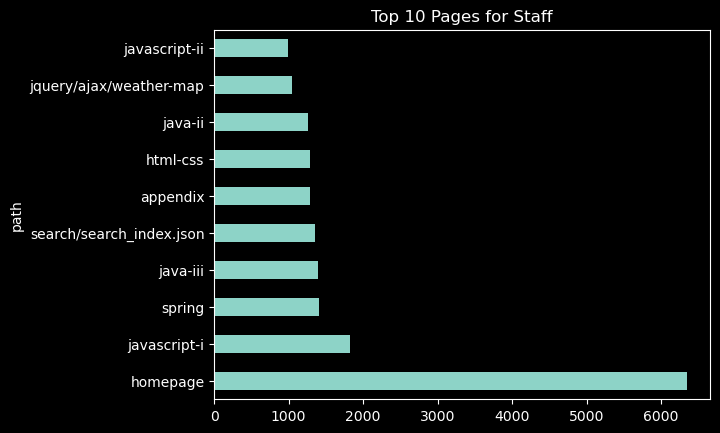

In [14]:
# Which lesson appears to attract the most traffic per program (staff)

staff.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Pages for Staff')

Staff access the Javascript I lesson most often as well.

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### Web Dev Cohorts

With the curriculum changing from 2016 to 2021, this didn't provide much useful information, so we'll only look at classes since 2021. These classes have much more similar curriculum.

#### Only RECENT Web Java classes (similar curriculum)

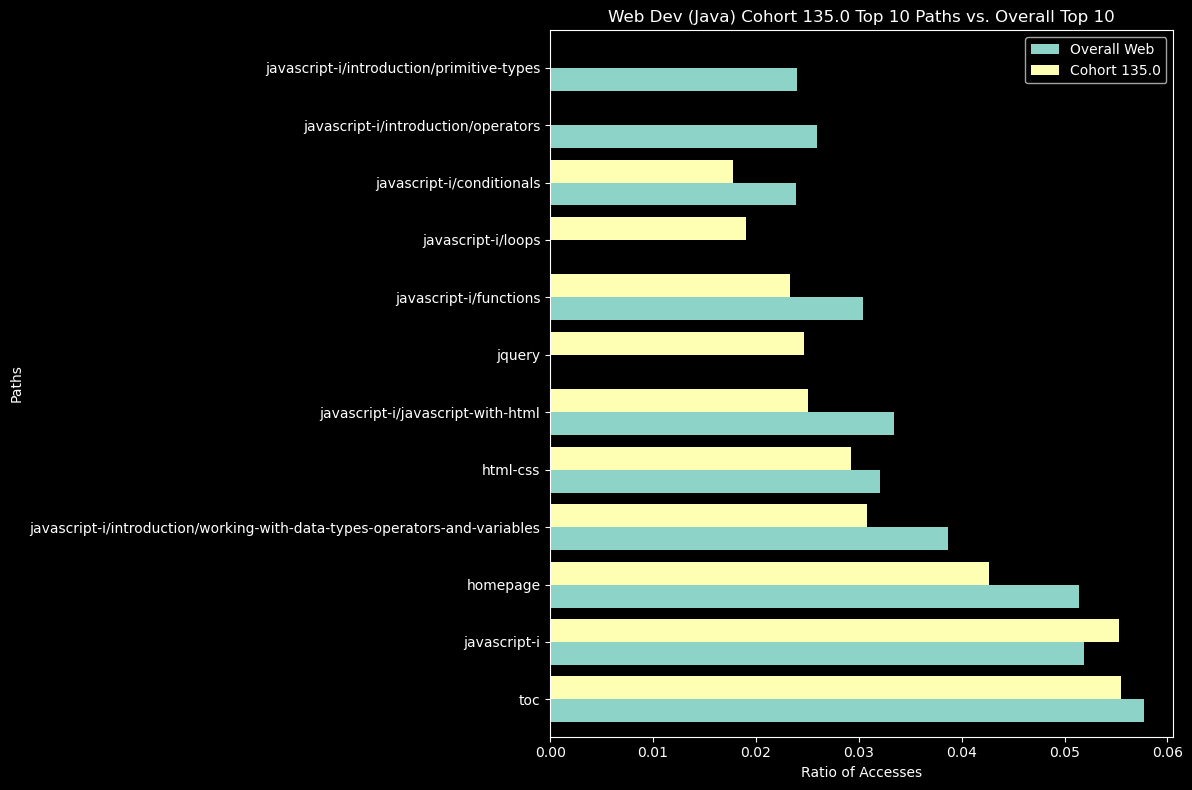

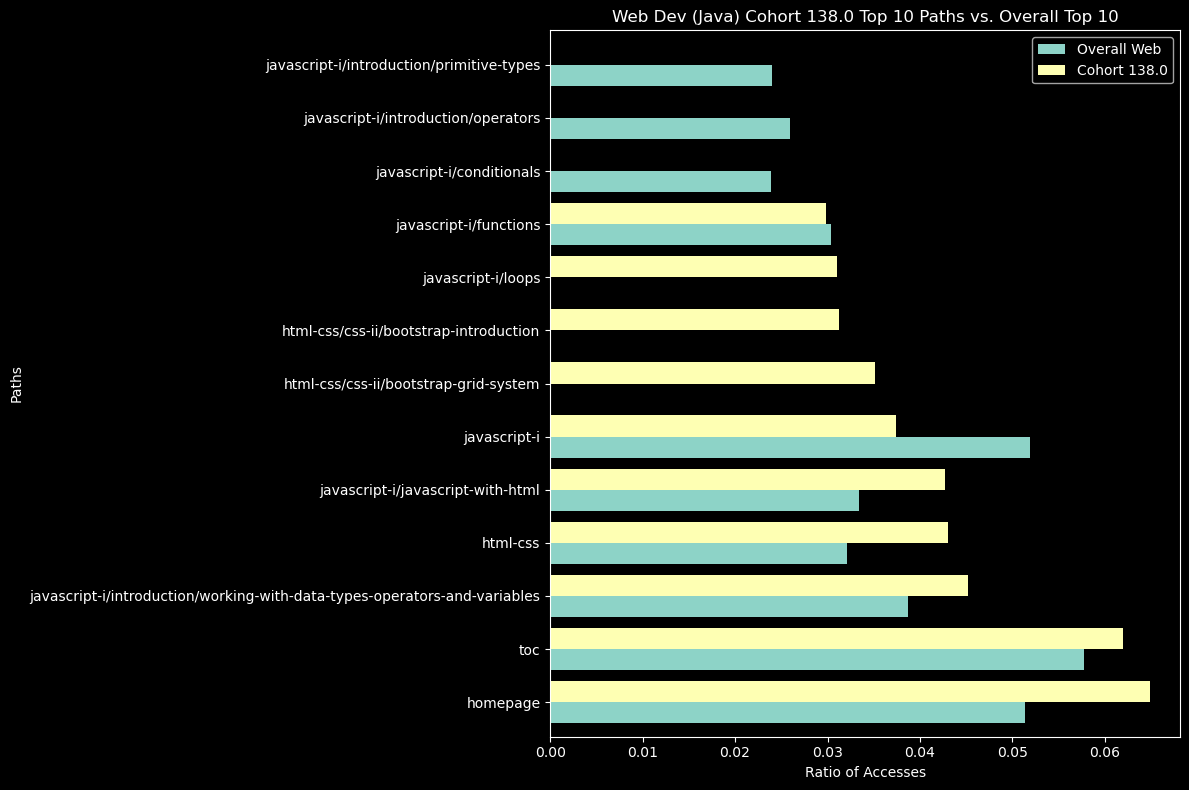

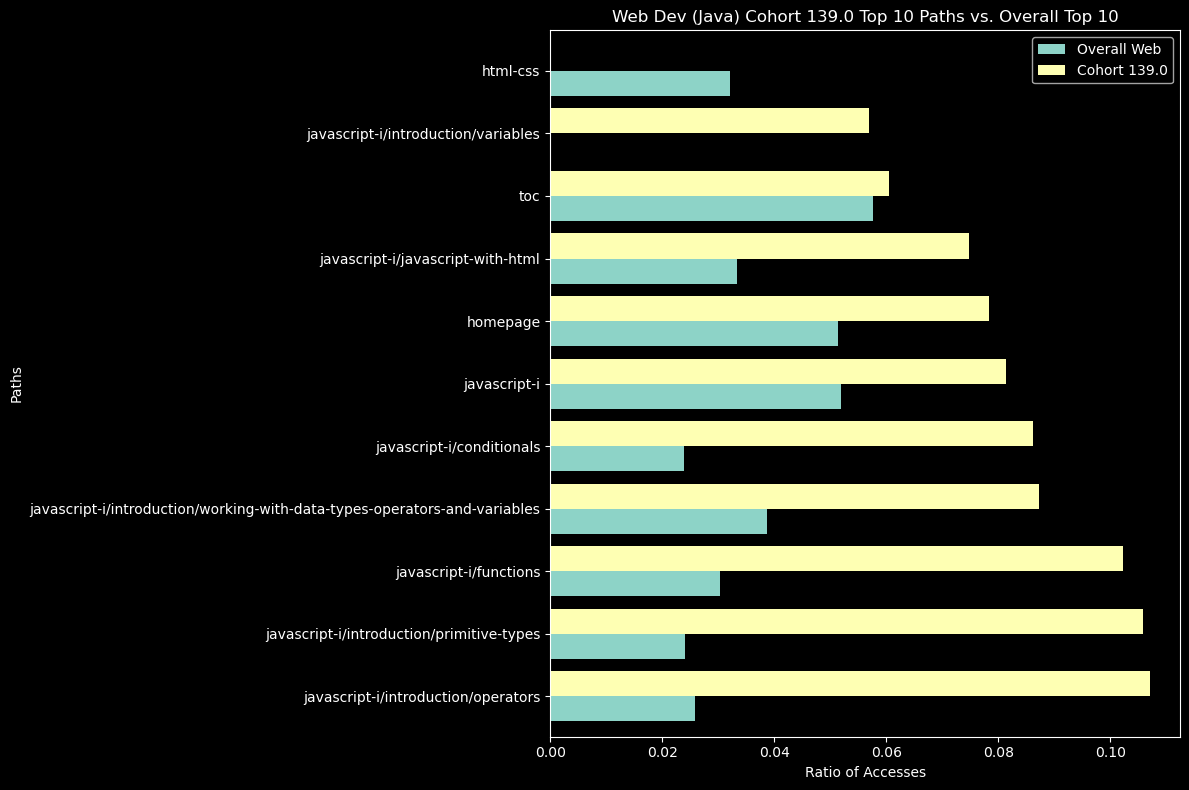

In [15]:
w.plot_web_top_paths(webjava, 10)

The most recent classes tend to put much more importance on Javascript I.

Since web dev front end ended in 2016 and PHP ended in 2017, we won't analyze those.

### Data Cohorts

#### Only RECENT Data Cohorts (similar curriculum)

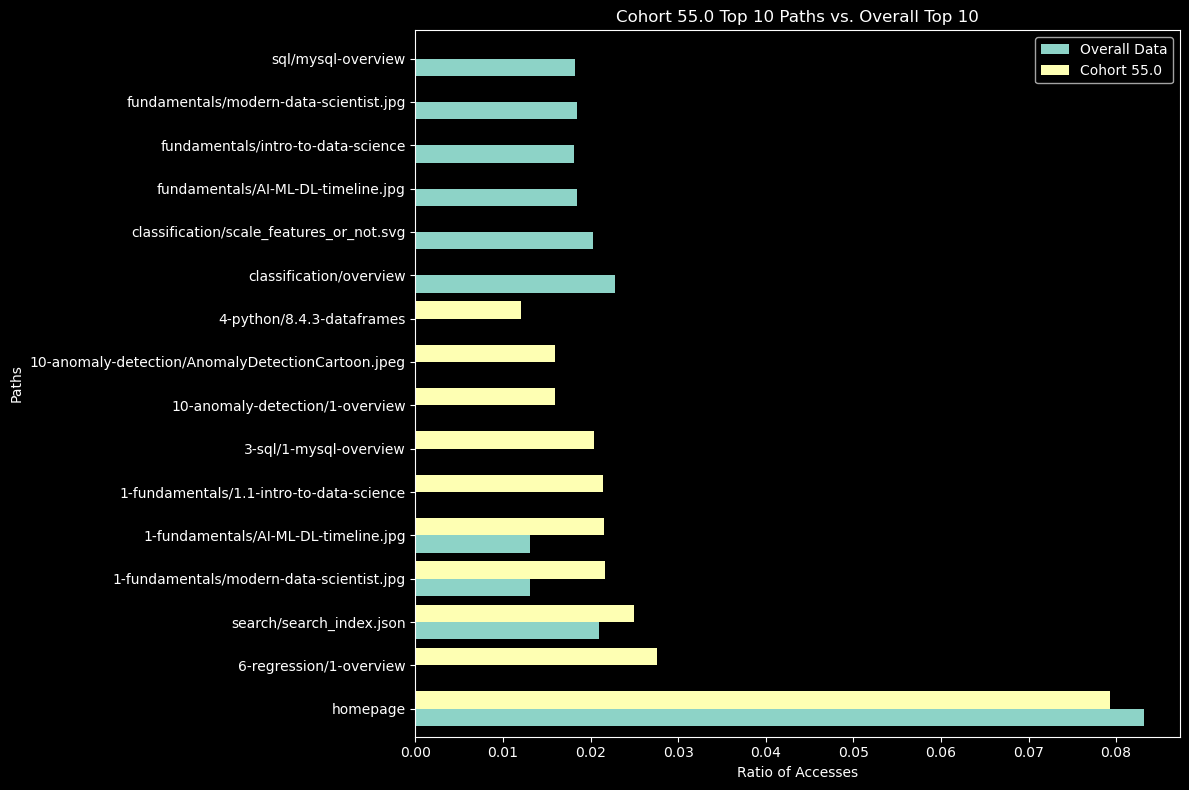

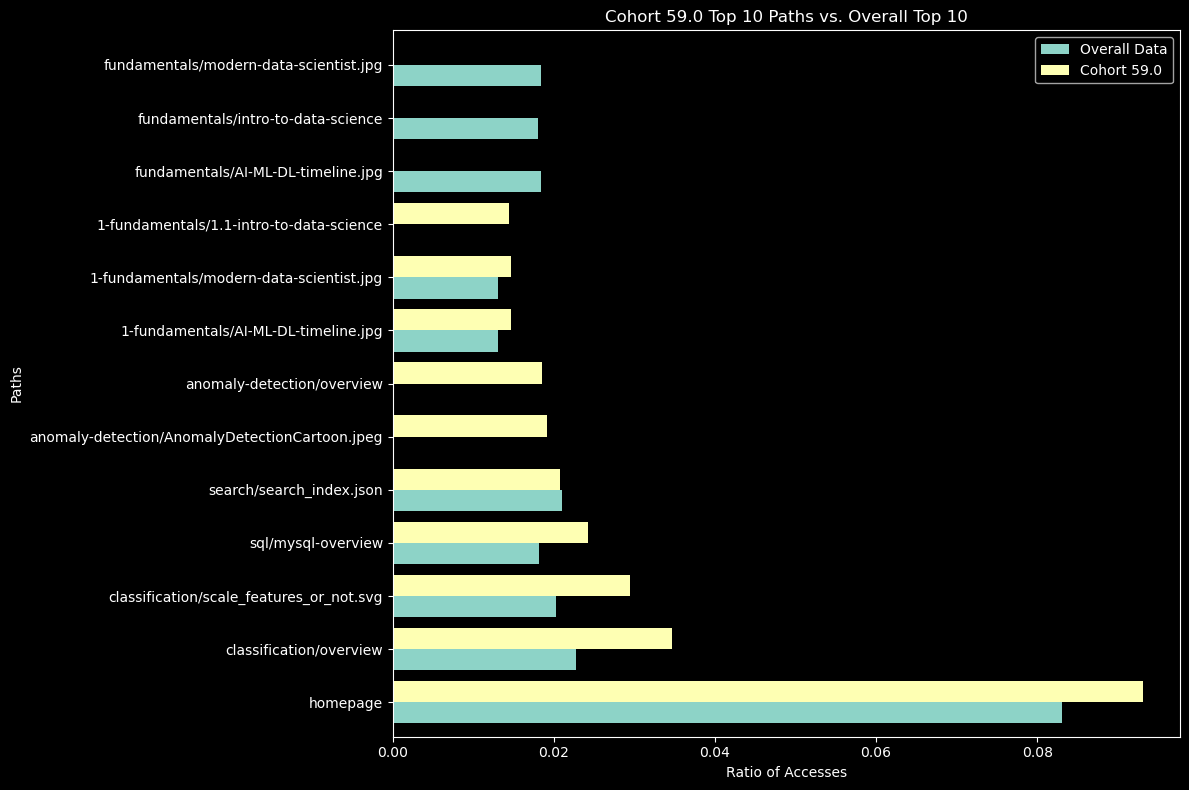

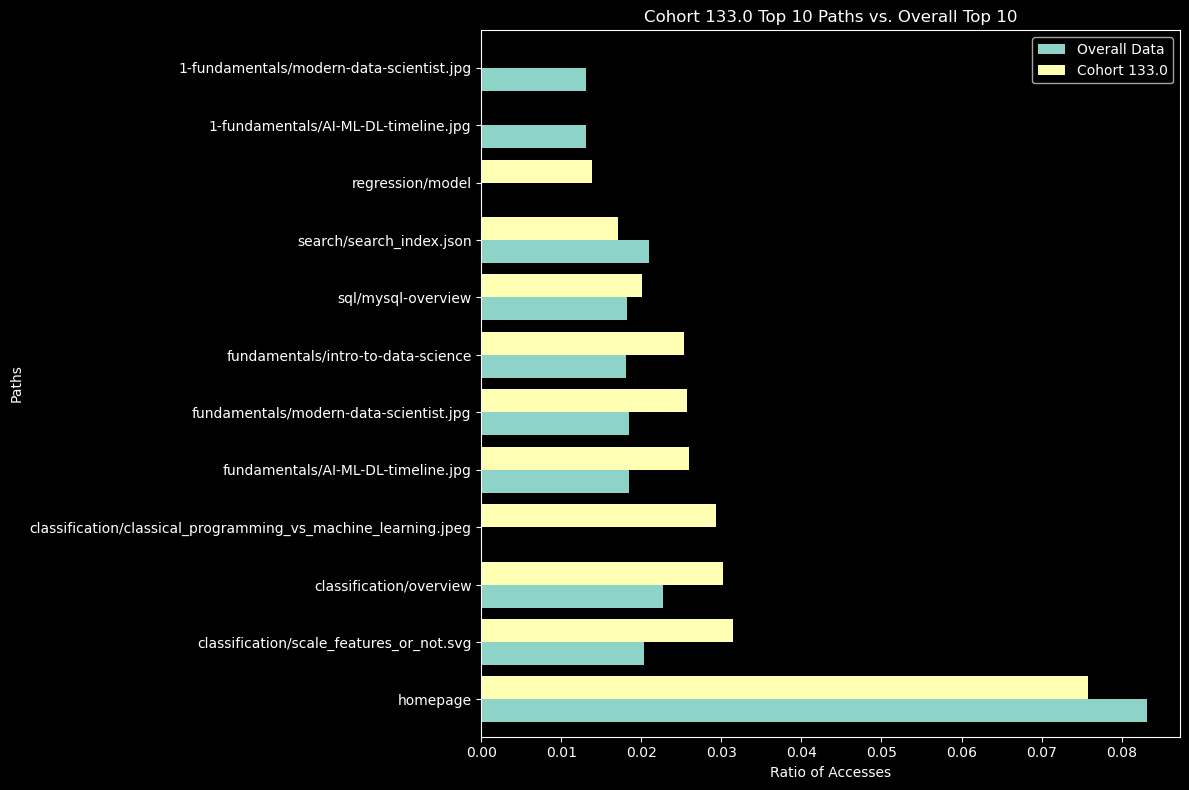

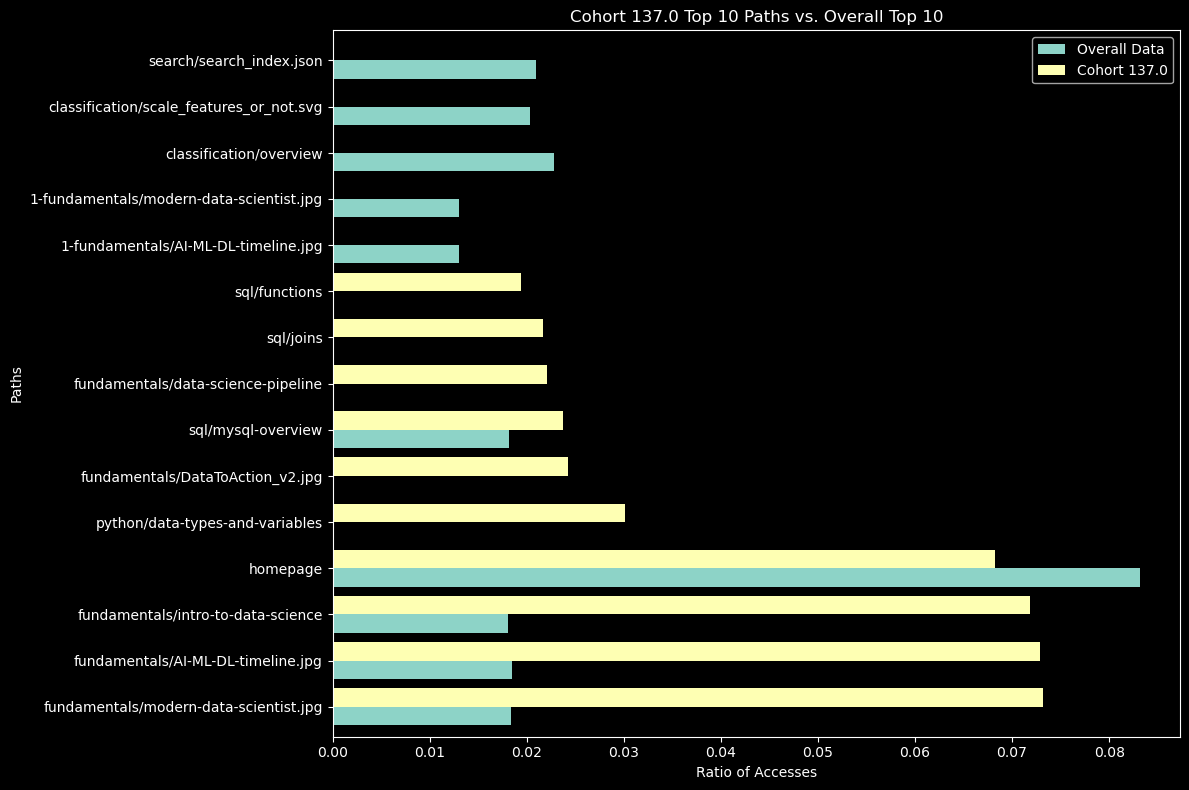

In [16]:
w.plot_data_top_paths(data, 10)

Recent data looks to put a much higher focus on all around fundamentals.


### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


In [17]:
# Filter the dataframe to only include rows where the access date is between the cohort's start and end dates
filtered_data = df[df.apply(lambda x: x['class_start'] <= x['datetime'] <= x['class_end'], axis=1)]

# Count the number of times each user_id appears in the filtered dataframe
user_counts = filtered_data['user_id'].value_counts()

# Identify the 10 user IDs with the least counts
bottom_10_users = user_counts.nsmallest(10)
bottom_10_users

user_id
879    1
940    1
918    1
619    1
832    3
278    4
539    5
956    6
812    7
388    8
Name: count, dtype: int64

In [18]:
# Look at these students

df[df.user_id.isin([879, 940, 918, 619, 832, 278, 539, 956, 812, 388])]

,Unnamed: 0,path,user_id,cohort_id,source_ip,datetime,endpoint,startpoint,name,class_start,class_end,program
131699,131699,homepage,278,24.0,97.105.19.58,2018-09-27 13:57:44,NaN,homepage,Voyageurs,2018-05-29,2018-10-11,web_java
131788,131788,java-ii/arrays,278,24.0,107.77.217.9,2018-09-27 14:47:37,arrays,java-ii,Voyageurs,2018-05-29,2018-10-11,web_java
131802,131802,java-ii/arrays,278,24.0,107.77.217.9,2018-09-27 14:58:48,arrays,java-ii,Voyageurs,2018-05-29,2018-10-11,web_java
131804,131804,java-ii/collections,278,24.0,107.77.217.9,2018-09-27 14:59:07,collections,java-ii,Voyageurs,2018-05-29,2018-10-11,web_java
141611,141611,homepage,278,24.0,67.11.175.66,2018-10-16 18:55:42,NaN,homepage,Voyageurs,2018-05-29,2018-10-11,web_java
...,...,...,...,...,...,...,...,...,...,...,...,...
891690,891690,homepage,956,139.0,162.200.114.251,2021-04-15 14:54:05,NaN,homepage,Oberon,2021-04-12,2021-10-01,web_java
891694,891694,toc,956,139.0,162.200.114.251,2021-04-15 14:54:10,toc,toc,Oberon,2021-04-12,2021-10-01,web_java
891710,891710,javascript-i/introduction/operators,956,139.0,162.200.114.251,2021-04-15 14:55:05,operators,javascript-i,Oberon,2021-04-12,2021-10-01,web_java
891724,891724,javascript-i/introduction/primitive-types,956,139.0,162.200.114.251,2021-04-15 14:56:04,primitive-types,javascript-i,Oberon,2021-04-12,2021-10-01,web_java


These students look to drop out of the course relatively quickly. It seems that they were not prepared financially or academically and withdrew.

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

We excluded 97.105 IP addresses, due to those being Codeup wifi IP addresses

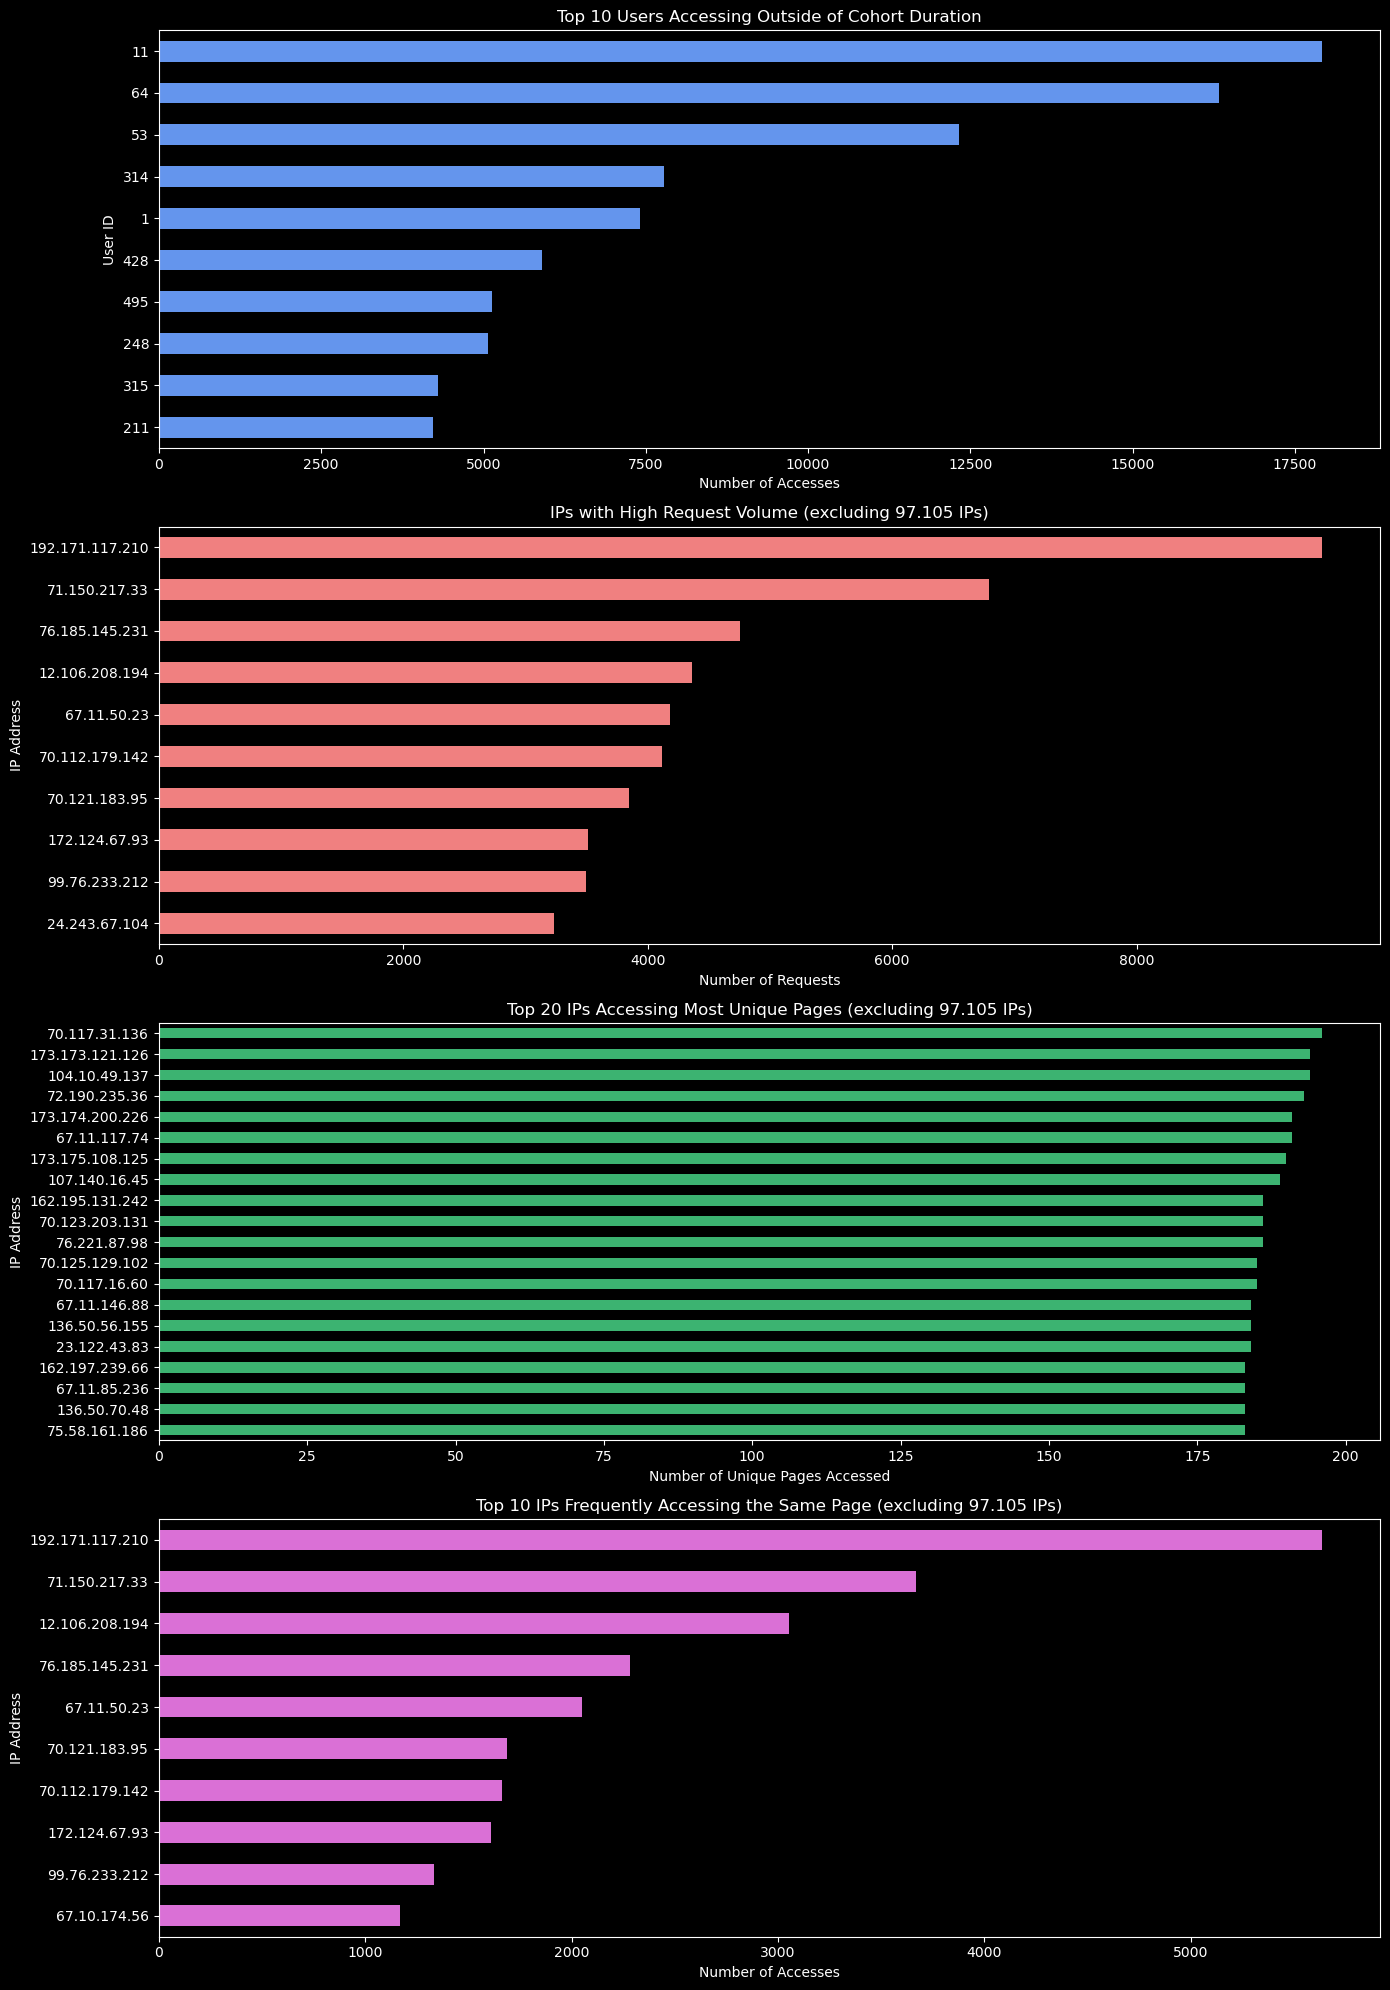

In [19]:
w.plot_active_selection(df)

In [20]:
# Show IP 97.105.19.58

df[df.source_ip == '97.105.19.58']

,Unnamed: 0,path,user_id,cohort_id,source_ip,datetime,endpoint,startpoint,name,class_start,class_end,program
86014,86014,javascript-ii/promises,211,1.0,97.105.19.58,2018-07-16 07:51:57,promises,javascript-ii,Arches,2014-02-04,2014-04-22,web_php
86015,86015,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,2018-07-16 07:58:03,map-filter-reduce,javascript-ii,Arches,2014-02-04,2014-04-22,web_php
86016,86016,javascript-ii/promises,211,1.0,97.105.19.58,2018-07-16 07:59:50,promises,javascript-ii,Arches,2014-02-04,2014-04-22,web_php
86017,86017,index.html,53,14.0,97.105.19.58,2018-07-16 08:07:37,index.html,index.html,Lassen,2016-07-18,2016-11-10,web_php
86018,86018,javascript-ii,53,14.0,97.105.19.58,2018-07-16 08:07:41,javascript-ii,javascript-ii,Lassen,2016-07-18,2016-11-10,web_php
...,...,...,...,...,...,...,...,...,...,...,...,...
491216,491216,toc,625,57.0,97.105.19.58,2020-03-23 15:10:09,toc,toc,Ganymede,2020-03-23,2020-08-20,web_java
491218,491218,toc,623,57.0,97.105.19.58,2020-03-23 15:10:18,toc,toc,Ganymede,2020-03-23,2020-08-20,web_java
491221,491221,homepage,627,57.0,97.105.19.58,2020-03-23 15:20:39,NaN,homepage,Ganymede,2020-03-23,2020-08-20,web_java
491226,491226,homepage,628,57.0,97.105.19.58,2020-03-23 15:24:54,NaN,homepage,Ganymede,2020-03-23,2020-08-20,web_java


This is a codeup IP and is refreshed when the IP lease is over.

In [21]:
# Show user 11

df[df.user_id == 11]

# Looks like it is a student that started working here

,Unnamed: 0,path,user_id,cohort_id,source_ip,datetime,endpoint,startpoint,name,class_start,class_end,program
30,30,homepage,11,1.0,97.105.19.61,2018-01-26 10:14:47,NaN,homepage,Arches,2014-02-04,2014-04-22,web_php
31,31,javascript-i,11,1.0,97.105.19.61,2018-01-26 10:14:51,javascript-i,javascript-i,Arches,2014-02-04,2014-04-22,web_php
33,33,javascript-i/functions,11,1.0,97.105.19.61,2018-01-26 10:15:02,functions,javascript-i,Arches,2014-02-04,2014-04-22,web_php
134,134,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61,2018-01-26 11:46:29,hoisting.html,appendix,Arches,2014-02-04,2014-04-22,web_php
136,136,appendix,11,1.0,97.105.19.61,2018-01-26 11:46:39,appendix,appendix,Arches,2014-02-04,2014-04-22,web_php
...,...,...,...,...,...,...,...,...,...,...,...,...
900020,900020,fundamentals/diagram-of-ds-pipeline-fraud-exam...,11,28.0,76.185.131.226,2021-04-21 14:21:05,diagram-of-ds-pipeline-fraud-example.jpeg,fundamentals,Staff,2014-02-04,2014-02-04,staff
900021,900021,fundamentals/ml-methodologies-drawing.jpg,11,28.0,76.185.131.226,2021-04-21 14:21:05,ml-methodologies-drawing.jpg,fundamentals,Staff,2014-02-04,2014-02-04,staff
900022,900022,fundamentals/modern-data-scientist.jpg,11,28.0,76.185.131.226,2021-04-21 14:21:05,modern-data-scientist.jpg,fundamentals,Staff,2014-02-04,2014-02-04,staff
900023,900023,fundamentals/AI-ML-DL-timeline.jpg,11,28.0,76.185.131.226,2021-04-21 14:21:05,AI-ML-DL-timeline.jpg,fundamentals,Staff,2014-02-04,2014-02-04,staff


**Users Accessing Outside of Cohort Duration:** 

- There are several users who accessed the curriculum outside of their cohort's start and end dates. The user with ID 11, for example, accessed the curriculum 17,913 times outside their cohort duration. Although, it looks like a student that is now staff.

**High Request Volume:** 

- IPs like 97.105.19.58 made a total of 284,579 requests, which is unusually high and falls in the top 1% of all IP request counts. Looks like it is a reused IP?

**Unique Page Access:** 

- IPs such as 104.10.49.137 accessed 194 unique pages, which is in the top 1% of IPs based on unique page access. Rapidly accessing a wide variety of pages might suggest automated behavior.

**Frequent Access to the Same Page:** 

- There are several IPs that accessed the same page a high number of times in quick succession. This might indicate either a faulty script or a scraping attempt.

**Suspicious IP Addresses:** 

- There are many IP addresses that accessed the curriculum but are not associated with any known cohort. These might be potential unauthorized accesses.

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

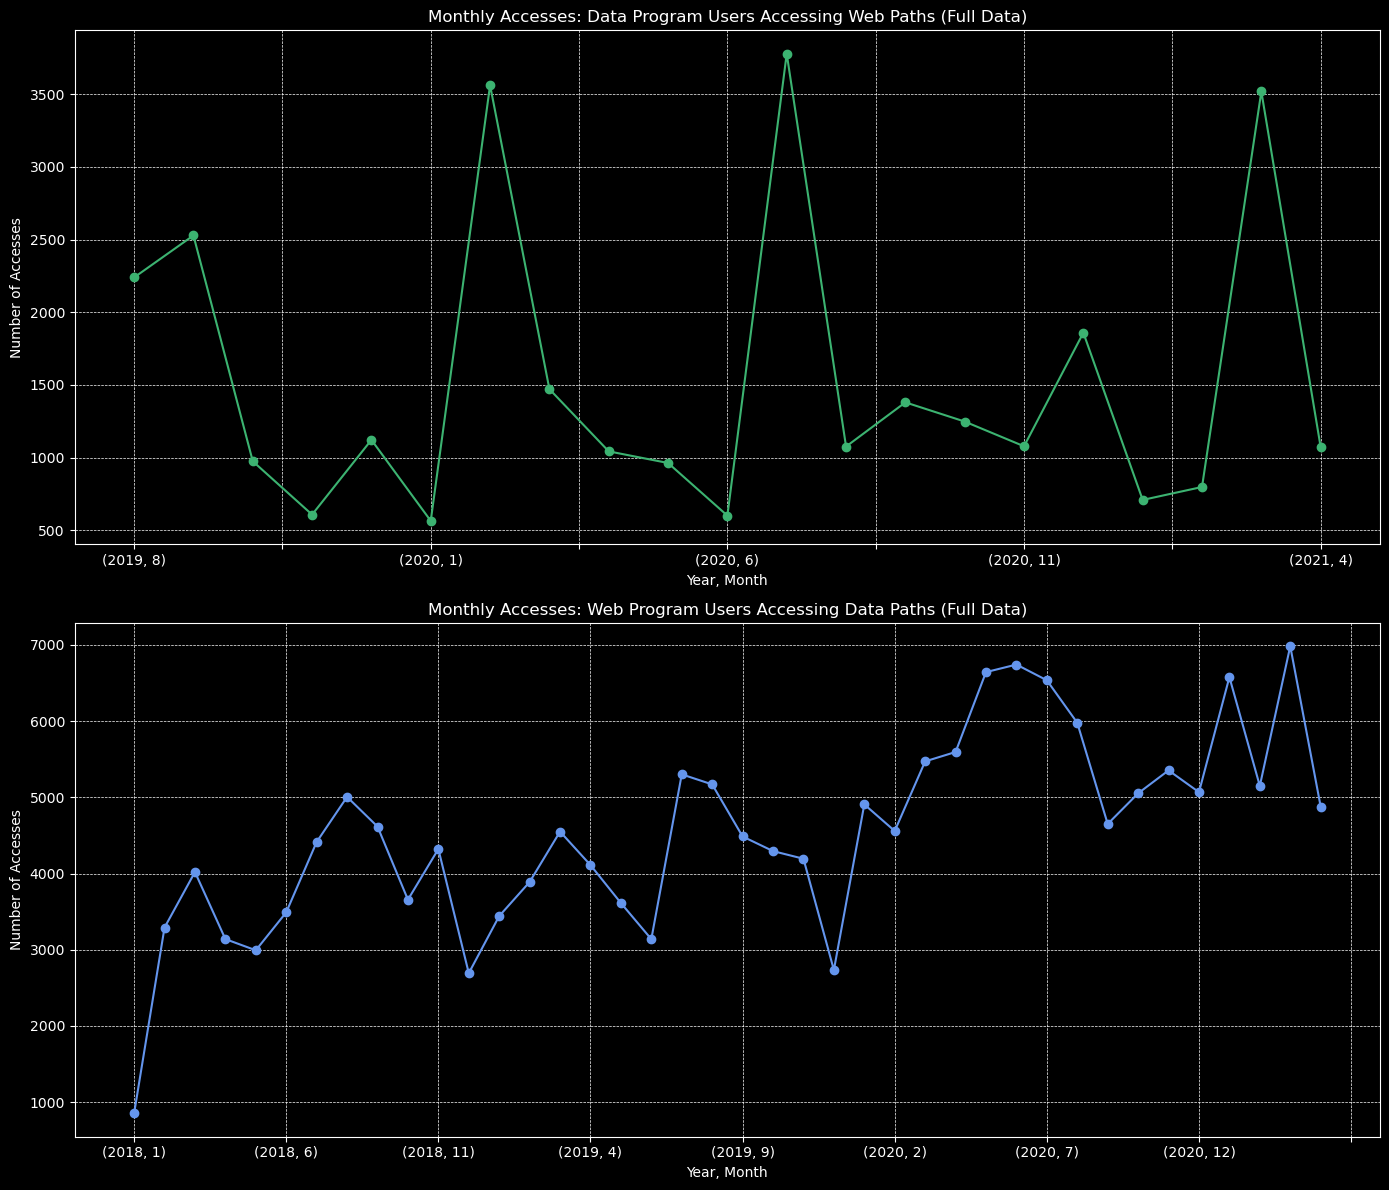

In [22]:
w.plot_program_cross_access(df)

Data accessing web seems to have a large spike every 5 months or so. It could be due to a data science project, or potentially someone webscraping the curriculum.

Web accessing the data science curriculum seems fairly consistent, however it does include before data science was even offered at Codeup. Access doesn't seem to have ever been limited.

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

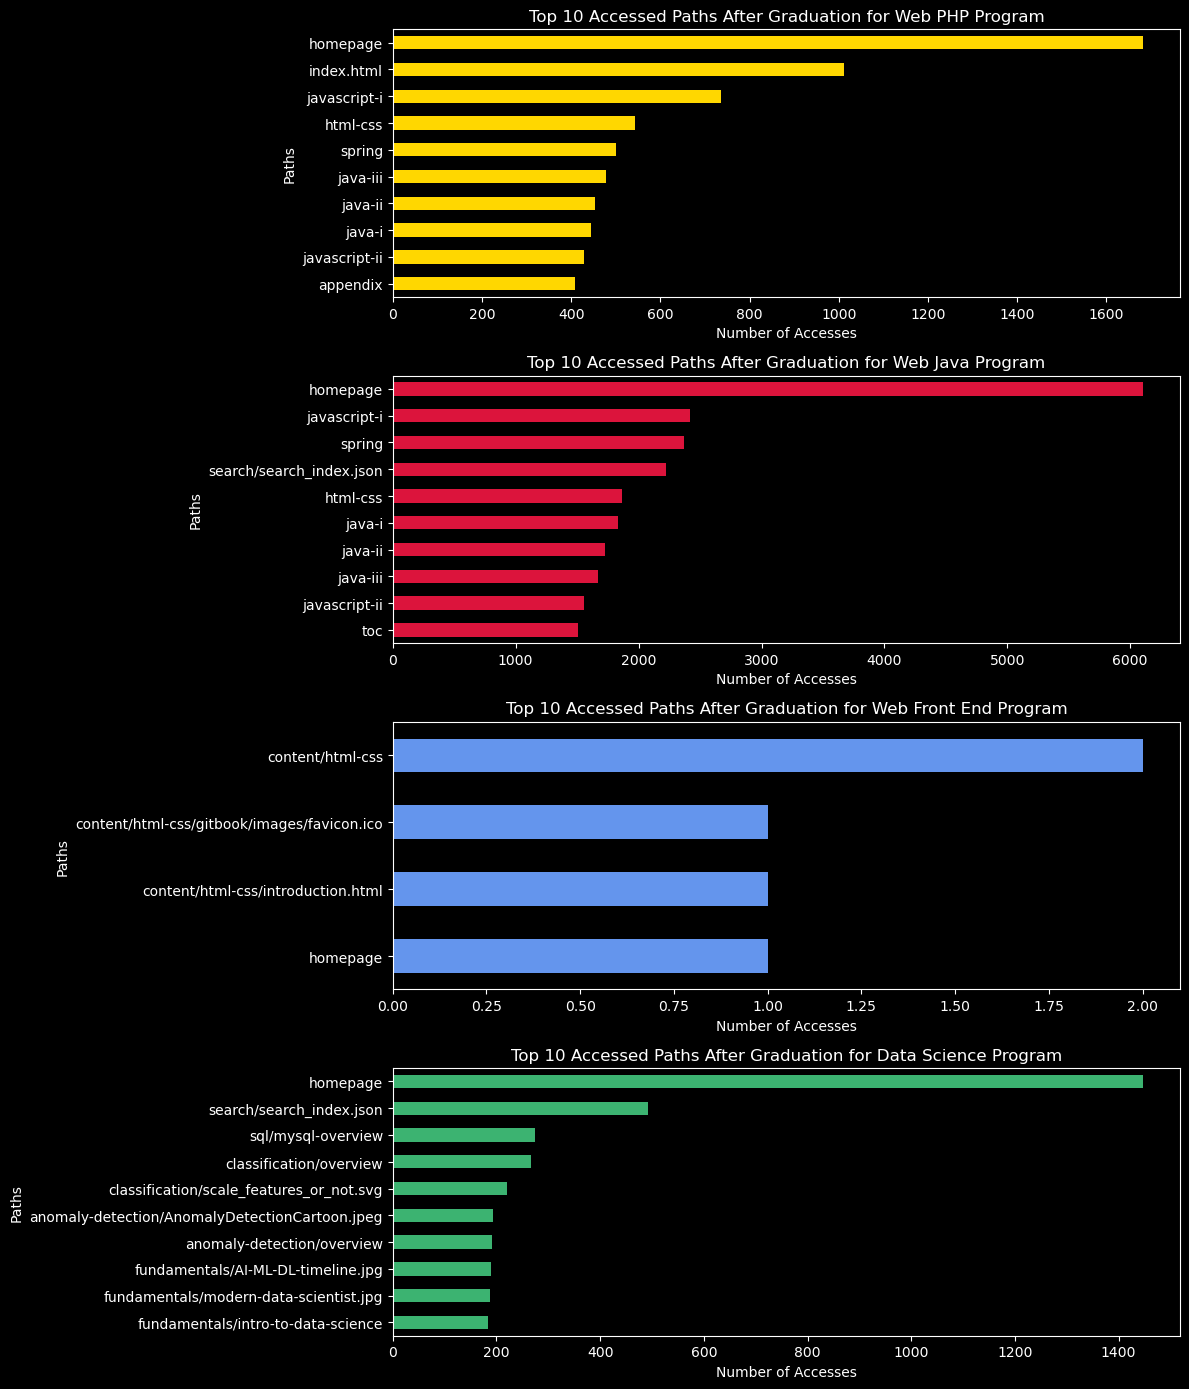

In [23]:
w.plot_top_post_grad_paths(df)

- Web development alumni appear to reference back to Javascript I and HTML-CSS after graduation.

- Data alumni appear to reference back to SQL and Classification after graduation.

### 7. Which lessons are least accessed?

<Axes: ylabel='startpoint'>

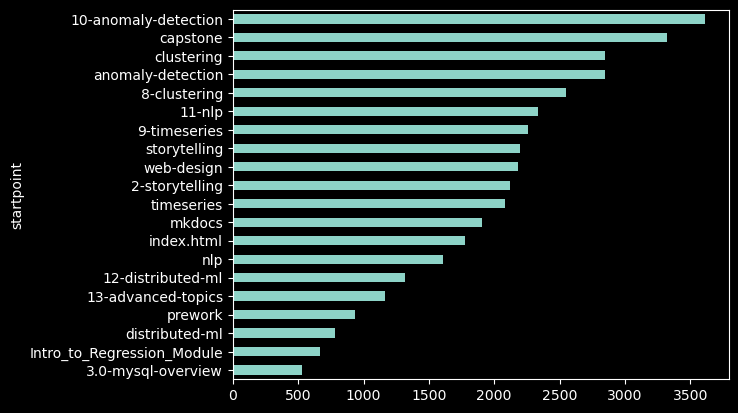

In [24]:
# Count the number of accesses for each path
path_access_counts = df['startpoint'].value_counts()

# Filter out paths with fewer than 1,000 accesses and sort them in ascending order
least_accessed_paths = path_access_counts[path_access_counts >= 500].sort_values()

least_accessed_paths.head(20).plot.barh()

- For web dev, web-design appears to be the least accessed lesson.

- Oddly enough, for data, the mySQL seems to be one of the least accessed. This may be why alumni are referencing back to it. 

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Questions → </i></font> <font size='10'><i>**Answers**</i></font>
---

**1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?**

- Top Web Dev (PHP) Lesson: Javascript I

- Top Web Dev (Java) Lesson: Javascript I

- Top Web Dev (Front End) Lesson: HTML-CSS
 
- Top Web Dev (Data) Lesson: Classification

**2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?**

- In recent web classes, there seems to be more of a focus on Javascript I variables

- In recent data classes, there is a larger focus on fundamentals.

**3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?**

- Many students stopped accessing around 3 to 5 days in. I'd assume they weren't prepared and dropped out. Better preparation could be looked into.

**4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?**

- User ID 11 is now staff and was a former student. They should be given a new ID.

- Some IP addresses have hit the same page over 5000 times. This could be looked into for potential denial of service (DOS) intent.

- Many IP addresses have visited over 170 unique pages. The average is about 12 pages. This could be looked into for web scraping.


**5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?**

- While there is a significant dip in data science users accessing the web curriculum in 9/2019, there is a large jump every 5 months where access goes up 7 times from the month prior. This could indicate someone offloading the curriculum.

- It looks like the web students have had continuous access to the data science curriculum and hits are continuously rising.

**6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?**

- Web development alumni appear to reference back to Javascript I and HTML-CSS after graduation.

- Data alumni appear to reference back to SQL and Classification after graduation.

**7. Which lessons are least accessed?**

- For web dev, web-design appears to be the least accessed lesson.

- Oddly enough, for data, the mySQL seems to be one of the least accessed. This may be why alumni are referencing back to it. 